In [7]:
pip install numpy==1.22.4

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.0
    Uninstalling numpy-1.23.0:
      Successfully uninstalled numpy-1.23.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 KB 270.7 kB/s eta 0:00:000:00:010:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 452.6 kB/s eta 0:00:001m482.1 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud

import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pyspark.sql.types as t
import pyspark.sql.functions as f

In [5]:
spark = (SparkSession.builder.config("spark.driver.memory","4g").config("spark.driver.maxResultSize", "4g").getOrCreate())

24/04/30 09:54:36 WARN Utils: Your hostname, ajit-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
24/04/30 09:54:36 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/30 09:54:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:


# import dataframe by spark
df = spark.read.csv(path='./charts.csv', inferSchema=True, header=True)



In [5]:


# setting the schema

df = df.withColumn("rank", f.col("rank").cast(t.IntegerType())).withColumn("date", f.col("date").cast(t.DateType())).withColumn("streams", f.col("streams").cast(t.IntegerType()))



In [6]:
df.show()

+--------------------+----+----------+--------------------+--------------------+---------+------+-------------+-------+
|               title|rank|      date|              artist|                 url|   region| chart|        trend|streams|
+--------------------+----+----------+--------------------+--------------------+---------+------+-------------+-------+
|Chantaje (feat. M...|   1|2017-01-01|             Shakira|https://open.spot...|Argentina|top200|SAME_POSITION| 253019|
|Vente Pa' Ca (fea...|   2|2017-01-01|        Ricky Martin|https://open.spot...|Argentina|top200|      MOVE_UP| 223988|
|Reggaetón Lento (...|   3|2017-01-01|                CNCO|https://open.spot...|Argentina|top200|    MOVE_DOWN| 210943|
|              Safari|   4|2017-01-01|J Balvin, Pharrel...|https://open.spot...|Argentina|top200|SAME_POSITION| 173865|
|         Shaky Shaky|   5|2017-01-01|        Daddy Yankee|https://open.spot...|Argentina|top200|      MOVE_UP| 153956|
|         Traicionera|   6|2017-01-01|  

In [7]:


# Register a temp table
df.registerTempTable("charts")



/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [8]:
#Get the range of timeline of the data
spark.sql('''
SELECT MIN(date) begin, MAX(date) end 
FROM charts 
WHERE chart = 'top200';
''').toPandas()

,begin,end
0,2017-01-01,2021-12-31


In [9]:
#View the head of the chart
spark.sql('''
SELECT * 
FROM charts 
WHERE chart = 'top200' 
LIMIT 10;
''').toPandas()

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956
5,Traicionera,6,2017-01-01,Sebastian Yatra,https://open.spotify.com/track/5J1c3M4EldCfNxX...,Argentina,top200,MOVE_DOWN,151140
6,Cuando Se Pone a Bailar,7,2017-01-01,Rombai,https://open.spotify.com/track/1MpKZi1zTXpERKw...,Argentina,top200,MOVE_DOWN,148369
7,Otra vez (feat. J Balvin),8,2017-01-01,Zion & Lennox,https://open.spotify.com/track/3QwBODjSEzelZyV...,Argentina,top200,MOVE_DOWN,143004
8,La Bicicleta,9,2017-01-01,"Carlos Vives, Shakira",https://open.spotify.com/track/0sXvAOmXgjR2QUq...,Argentina,top200,MOVE_UP,126389
9,Dile Que Tu Me Quieres,10,2017-01-01,Ozuna,https://open.spotify.com/track/20ZAJdsKB5IGbGj...,Argentina,top200,MOVE_DOWN,112012


In [10]:
#Get the total number of observations by all the singers in TOP 200 chart
spark.sql('''
SELECT COUNT(*) NoOfObservationsTop200
FROM charts 
WHERE chart = 'top200';
''').toPandas().head(10)

,NoOfObservationsTop200
0,20318183


In [11]:
#Get the total number of songs by Ed Sheeran & Aspova appeared in Top 200
spark.sql('''
SELECT COUNT(DISTINCT title) NoOfSongs 
FROM charts 
WHERE artist LIKE '%Ed Sheeran%' AND chart = 'top200';
''').toPandas().head(10)

,NoOfSongs
0,121


In [13]:
#Aspova


spark.sql('''
SELECT COUNT(DISTINCT title) NoOfSongs 
FROM charts 
WHERE artist LIKE '%Aspova%' AND chart = 'top200';
''').toPandas().head(10)



,NoOfSongs
0,23


In [14]:
#Count the number of times Ed Sheeran & Aspova appeared in the TOP 200 chart
spark.sql('''
SELECT COUNT(*) NoInTop200 
FROM charts 
WHERE artist LIKE '%Ed Sheeran%' AND chart = 'top200';
''').toPandas().head(10)

,NoInTop200
0,368388


In [12]:
#Aspova
spark.sql('''
SELECT COUNT(*) NoInTop200 
FROM charts 
WHERE artist LIKE '%Aspova%' AND chart = 'top200';
''').toPandas().head(10)

,NoInTop200
0,1344


In [15]:
#Count the number of times Ed Sheeran and Aspova appeared in the Top 200 while collaborating with other singers
spark.sql('''
SELECT artist, COUNT(artist) count 
FROM charts 
WHERE artist LIKE '%Ed Sheeran%' AND chart = 'top200' 
GROUP BY artist 
ORDER BY count DESC;
''').toPandas().head(10)

,artist,count
0,Ed Sheeran,366026
1,"Taylor Swift, Ed Sheeran, Future",1995
2,"Tori Kelly, Ed Sheeran",176
3,"Ed Sheeran, Elton John",125
4,"Fireboy DML, Ed Sheeran",19
5,"Alonestar, Rick Live, Ed Sheeran",14
6,"The Weeknd, Ed Sheeran",9
7,"Taylor Swift, Ed Sheeran",8
8,"Alonestar, HerbertSkillz, Ed Sheeran",8
9,"Foy Vance, Ed Sheeran",4


In [16]:
#Aspova
spark.sql('''
SELECT artist, COUNT(artist) count 
FROM charts 
WHERE artist LIKE '%Aspova%' AND chart = 'top200' 
GROUP BY artist 
ORDER BY count DESC;
''').toPandas().head(10)

,artist,count
0,Aspova,762
1,"Şanışer, Kamufle, Mert Şenel, Mirac, Aga B, De...",223
2,"Aspova, Şanışer",96
3,"Aspova, Tanerman",67
4,"Aspova, Patron",52
5,"Tuğkan, Aspova",42
6,"Aspova, Şehinşah",35
7,"Şanışer, Fuat, Ados, Hayki, Server Uraz, Beta ...",32
8,"Vio, Aspova",8
9,"Aspova, Motive, Murgs",7


In [17]:
#Show the top 10 most popular songs of Ed Sheeran and Aspova
spark.sql('''
SELECT title, SUM(streams) streams 
FROM charts 
WHERE artist LIKE '%Ed Sheeran%' 
AND streams IS NOT NULL 
GROUP BY title 
ORDER BY streams DESC 
LIMIT 10;
''').toPandas().head(10)

,title,streams
0,Shape of You,5245740051
1,Perfect,3038712776
2,I Don't Care (with Justin Bieber),2296138118
3,Beautiful People (feat. Khalid),1612020133
4,Bad Habits,1473943611
5,Photograph,1081454379
6,Castle on the Hill,1021200333
7,Galway Girl,1007337746
8,Thinking out Loud,853200137
9,Happier,782141998


In [18]:
#Aspova
spark.sql('''
SELECT title, SUM(streams) streams 
FROM charts 
WHERE artist LIKE '%Aspova%' 
AND streams IS NOT NULL 
GROUP BY title 
ORDER BY streams DESC 
LIMIT 10;
''').toPandas().head(10)

,title,streams
0,Eskimiş Senelere,37435814
1,Susamam,20156260
2,Suç,3013264
3,Sağanak,2211168
4,Kader,2141421
5,Kanayan Yaralar,2046450
6,Ecel,2013589
7,Nude,1557447
8,TANIMIYORUM,742503
9,Içinde,361846


In [19]:
#Count the number of times top songs of Ed Sheeran & Aspova has appeared in top 200
spark.sql('''
SELECT title, COUNT(title) AS count 
FROM charts 
WHERE artist LIKE '%Ed Sheeran%' 
AND chart = 'top200' 
GROUP BY title 
ORDER BY count DESC;
''').toPandas().head(10)

,title,count
0,Shape of You,65262
1,Perfect,52392
2,Photograph,28605
3,I Don't Care (with Justin Bieber),27101
4,Thinking out Loud,26014
5,Beautiful People (feat. Khalid),21799
6,Happier,17056
7,Galway Girl,15614
8,Castle on the Hill,14653
9,Perfect Duet (Ed Sheeran & Beyoncé),11258


In [20]:
#Aspova
spark.sql('''
SELECT title, COUNT(title) AS count
FROM charts 
WHERE artist LIKE '%Aspova%' 
AND chart = 'top200' 
GROUP BY title 
ORDER BY count DESC;
''').toPandas().head(10)

,title,count
0,Eskimiş Senelere,645
1,Susamam,255
2,Suç,96
3,Sağanak,73
4,Nude,67
5,Kanayan Yaralar,52
6,Ecel,42
7,Kader,35
8,TANIMIYORUM,20
9,Dur Dedik,9


In [21]:
#Get the highest ranks the songs of Ed Sheeran and Aspova have attained
#Ed sheeran
spark.sql('''
SELECT title, MIN(rank) rank, COUNT(rank) count 
FROM charts 
WHERE artist LIKE '%Ed Sheeran%'
AND chart = 'top200' 
AND rank <= 10 
GROUP BY title
ORDER BY rank ASC;
''').toPandas().head(20)

,title,rank,count
0,Shape of You,1,11096
1,Castle on the Hill,1,2213
2,Perfect,1,1933
3,Bad Habits,1,4246
4,Beautiful People (feat. Khalid),1,3071
5,I Don't Care (with Justin Bieber),1,3877
6,Galway Girl,1,1287
7,Shivers,1,1866
8,Perfect Duet (Ed Sheeran & Beyoncé),1,610
9,Antisocial (with Travis Scott),2,256


In [22]:
#Aspova
spark.sql('''
SELECT title, MIN(rank) rank, COUNT(rank) count 
FROM charts 
WHERE artist LIKE '%Aspova%' 
AND chart = 'top200' 
AND rank <= 10 
GROUP BY title
ORDER BY rank ASC;
''').toPandas().head(20)

,title,rank,count
0,Susamam,1,44
1,Eskimiş Senelere,10,1


In [23]:
#Count the number times Ed Sheeran and Aspova have been on the 1st rank
#Ed Sheeran
spark.sql('''
SELECT COUNT(*) NoOfRank1 
FROM charts 
WHERE artist LIKE '%Ed Sheeran%' 
AND chart = 'top200' 
AND rank = 1;
''').toPandas().head(10)


,NoOfRank1
0,4810


In [24]:
#Aspova
spark.sql('''
SELECT COUNT(*) NoOfRank1 
FROM charts 
WHERE artist LIKE '%Aspova%' 
AND chart = 'top200' 
AND rank = 1;
''').toPandas().head(10)

,NoOfRank1
0,14


In [25]:
#Calculate the highest, lowest and the mean rank of the songs of Ed Sheeran and Aspova
#Ed Sheeran 
spark.sql('''
SELECT Title, MIN(rank) Highest, MAX(rank) Lowest, AVG(rank) Avg 
FROM charts 
WHERE artist like '%Ed Sheeran%' 
AND chart='top200' 
GROUP BY title 
ORDER BY Highest;
''').toPandas().head(10)

,Title,Highest,Lowest,Avg
0,Beautiful People (feat. Khalid),1,200,77.225240
1,Galway Girl,1,200,80.686499
2,Shape of You,1,200,80.527842
3,I Don't Care (with Justin Bieber),1,200,77.736910
4,Perfect Duet (Ed Sheeran & Beyoncé),1,200,101.299698
5,Castle on the Hill,1,200,86.030779
6,Perfect,1,200,102.164930
7,Bad Habits,1,200,41.974160
8,Shivers,1,200,41.899490
9,Eraser,2,200,97.767938


In [26]:
#Aspova
spark.sql('''
SELECT Title, MIN(rank) Highest, MAX(rank) Lowest, AVG(rank) Avg 
FROM charts 
WHERE artist like '%Aspova%' 
AND chart='top200' 
GROUP BY title 
ORDER BY Highest;
''').toPandas().head(10)

,Title,Highest,Lowest,Avg
0,Susamam,1,198,91.403922
1,Eskimiş Senelere,10,200,68.116279
2,Kanayan Yaralar,17,198,109.826923
3,Kader,21,192,84.000000
4,Içinde,30,177,94.750000
5,Ecel,31,156,95.714286
6,Suç,43,200,126.385417
7,TANIMIYORUM,51,197,122.500000
8,Nude,72,199,162.313433
9,Sür,73,190,140.000000


In [38]:
#Show the trends of top songs of Ed Sheeran and Aspova over time
#Ed Sheeran
q = spark.sql('''
SELECT title, YEAR(date) year, date, rank, region 
FROM charts 
WHERE title IN ('Shape of You','Castle on the Hill','Perfect') 
AND chart='top200'
ORDER BY rank ASC;''').toPandas()

In [39]:
q.head()

,title,year,date,rank,region
0,Shape of You,2018,2018-03-01,1,Japan
1,Shape of You,2017,2017-02-01,1,Australia
2,Shape of You,2017,2017-02-01,1,Austria
3,Shape of You,2017,2017-02-01,1,Belgium
4,Shape of You,2017,2017-02-01,1,Brazil


In [40]:
fig, axes = plt.subplots(figsize=(20,7))
sns.lineplot('date', 'rank', data=q, hue='title', errorbar=('ci',95).set_title('Trends in Top 200')

SyntaxError: incomplete input (1710491663.py, line 2)

In [4]:
#Aspova
p = spark.sql('''
SELECT title, YEAR(date) year, date, rank, region 
FROM charts 
WHERE title IN ('Eskimiş Senelere','Susamam','Suç') 
AND chart='top200'
ORDER BY rank ASC;''').toPandas()

NameError: name 'spark' is not defined

NameError: name 'p' is not defined

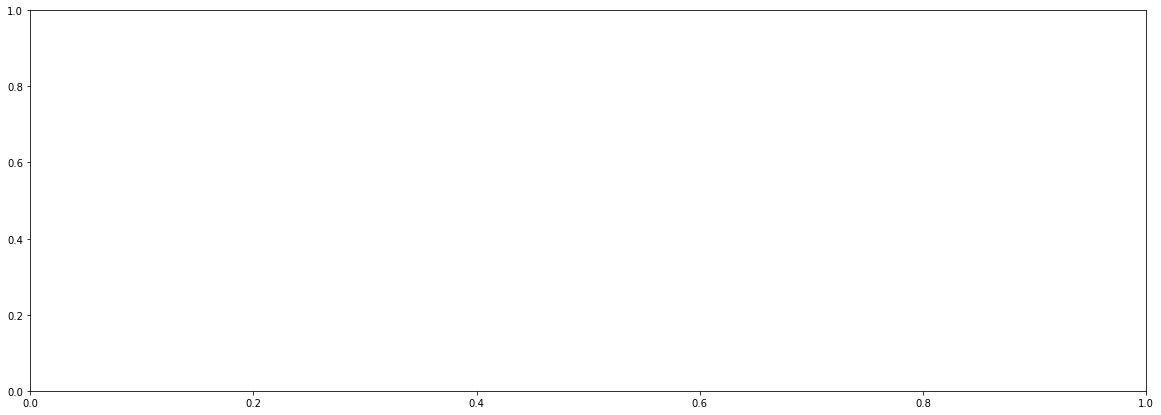

In [3]:


fig, axes = plt.subplots(figsize=(20,7))
sns.lineplot(x='date',y= 'rank', data=p, hue='title', errorbar=None).set_title('Trends in Top 200')

